In [2]:
import numpy as np

A = np.array([[0.91, -0.81,  0,     0,     0,    0,      0   ],
              [0,     0.91, -0.81,  0,     0,    0,      0   ],
              [0,     0,     0.91, -0.81,  0,    0,      0   ],
              [0,     0,     0,     0.91, -0.81, 0,      0   ],
              [0,     0,     0,     0,     0.91, -0.81,  0   ],
              [0,     0,     0,     0,     0,     0.91, -0.81],
              [0,     0,     0,     0,     0,     0,     1   ]])

b = np.array([[0],[0],[0],[0],[0],[0],[100]])

V_PI = np.linalg.inv(A) @ b

V_PI

array([[ 49.73495844],
       [ 55.87507676],
       [ 62.77323439],
       [ 70.52301641],
       [ 79.22956165],
       [ 89.01098901],
       [100.        ]])

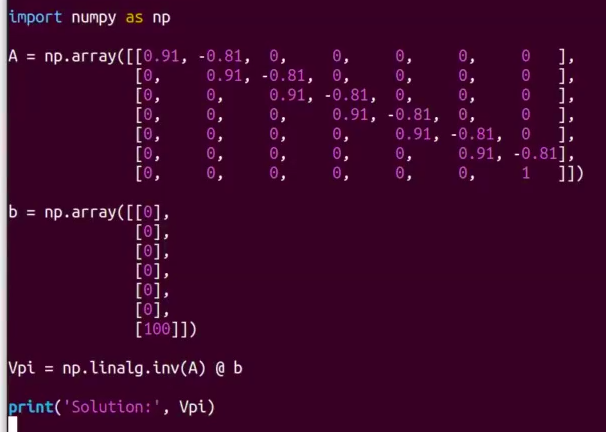

In [14]:
#Actions  L R U D

Psa = np.array([[[0.1,  0.9,   0,     0    ],
                [1.0,  0,     0,     0    ],
                [0.2,  0,     0,     0.8  ],
                [1.0,  0,     0,     0    ]],
               [[0,    1.0,   0,     0    ],
                [0.8,  0.2,   0,     0    ],
                [0,    0.2,   0.8,   0    ],
                [0,    1.0,   0,     0    ]],
               [[0,    0,     1.0,   0    ],
                [0,    0,     0.1,   0.9  ],
                [0,    0,     1.0,   0    ],
                [0,    0.8,   0.2,   0    ]],
               [[0,    0,     0,     0    ],
                [0,    0,     0,     0    ],
                [0,    0,     0,     0    ],
                [0,    0,     0,     0    ]]])
R = np.array([0, 0 , 0, 100])

def val_iterations(NS, R, NA, gamma, Psa):
    V = np.zeros(NS)
    while True:
        changed = False
        for s in range(NS):
            #print("New val: ", (Psa[s, :, :] @ V))
            newval = R[s] + gamma * (Psa[s, :, :] @ V).max()
            if newval != V[s]:
                changed = True
            V[s] = newval
        if not changed:
                break
    return V

Vstar = val_iterations(4, R, 4, 0.9, Psa)
print("Vstar: ", Vstar)

def policy(V, Psa):
    NS = len(V)
    pi = np.zeros(NS)
    for s in range(NS):
        pi[s] = (Psa[s, :, :] @ V).argmax()
    return pi

pistar = policy(Vstar, Psa)
print("pistar: ", pistar)


Vstar:  [ 87.80487805  78.15599035  89.01098901 100.        ]
pistar:  [2. 2. 1. 0.]


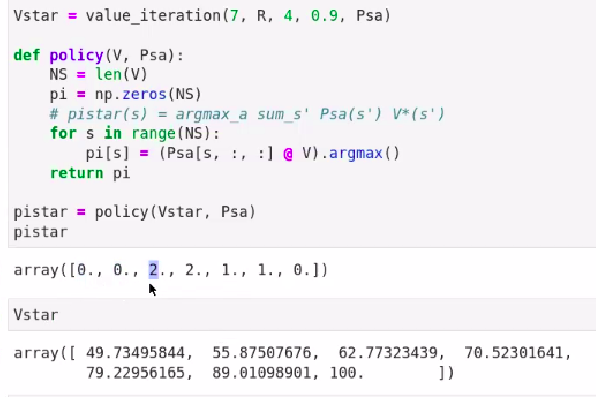

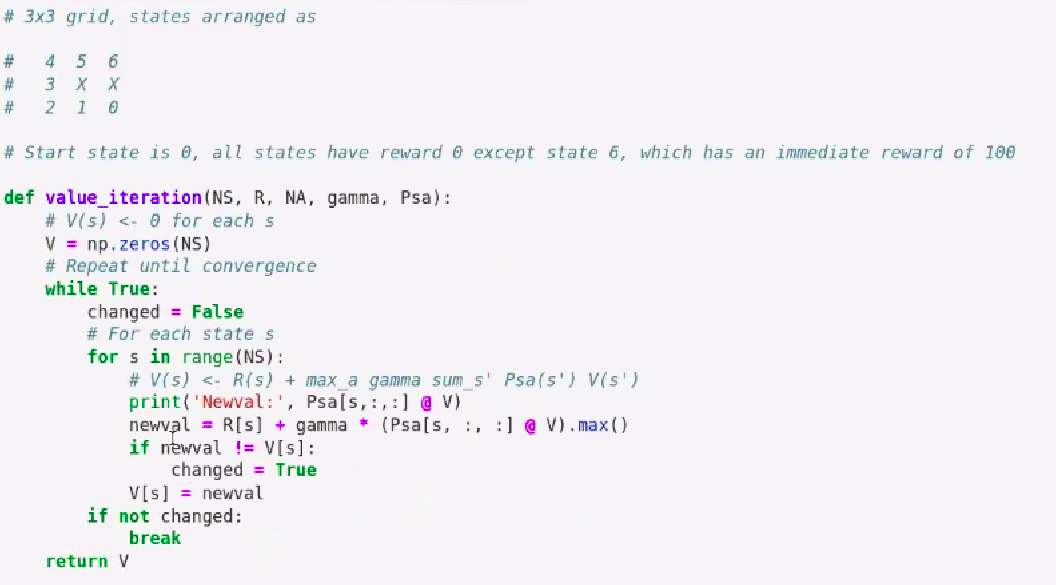

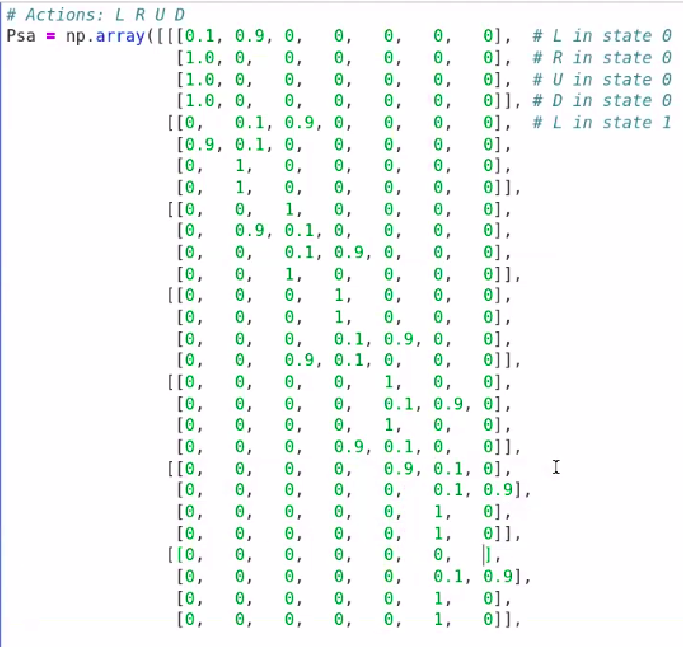